In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [2]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [3]:
file = "results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [4]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper', 'inductions', 'induction_depth', 'candidates', 'added_axioms']]

In [5]:
len(succeeded)

284

In [6]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
data.groupby('status').size()

status
ok                          284
parsing_other_exception     452
saturated                   172
viper_timeout              1264
dtype: int64

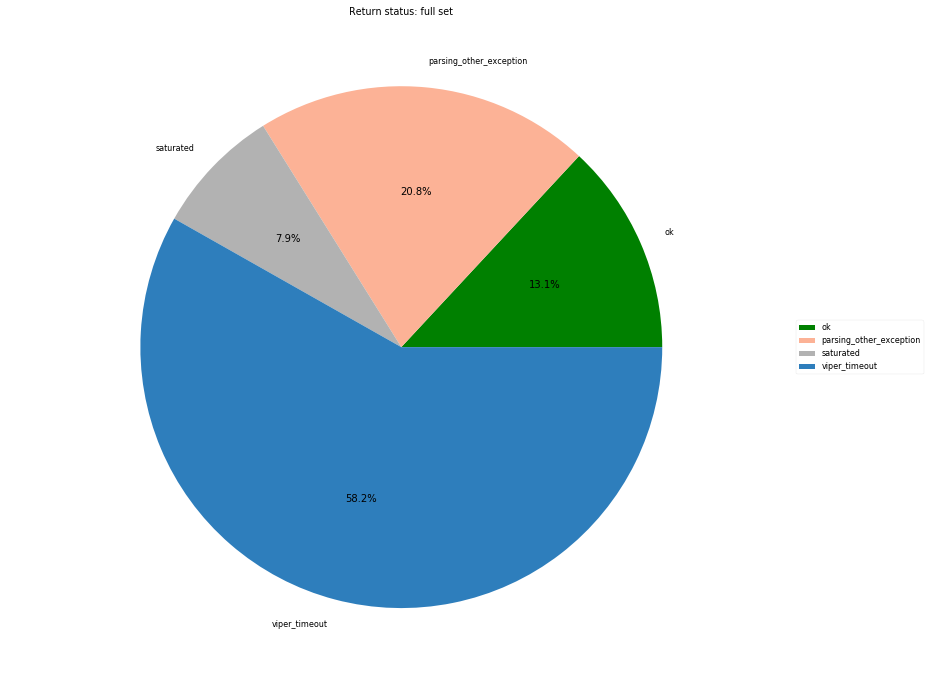

In [8]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

In [9]:
succeeded.groupby('mode').size()

mode
analytic_independent     60
analytic_sequential      97
spind                   103
treegrammar              24
dtype: int64

In [10]:
independent_success = succeeded[succeeded['mode'] == 'analytic_independent']
independent_files = set(independent_success.T.loc['file'])

In [11]:
sequential_success = succeeded[succeeded['mode'] == 'analytic_sequential']
sequential_files = set(sequential_success.T.loc['file'])

In [12]:
spind_success = succeeded[succeeded['mode'] == 'spind']
spind_files = set(spind_success.T.loc['file'])

In [13]:
independent_files - spind_files

{'isaplanner/prop_14.smt2',
 'isaplanner/prop_35.smt2',
 'isaplanner/prop_36.smt2',
 'isaplanner/prop_43.smt2',
 'tip2015/list_nat_perm_refl.smt2',
 'tip2015/list_perm_refl.smt2'}

In [14]:
spind_files - independent_files

{'isaplanner/prop_01.smt2',
 'isaplanner/prop_05.smt2',
 'isaplanner/prop_09.smt2',
 'isaplanner/prop_12.smt2',
 'isaplanner/prop_19.smt2',
 'isaplanner/prop_22.smt2',
 'isaplanner/prop_23.smt2',
 'isaplanner/prop_25.smt2',
 'isaplanner/prop_31.smt2',
 'isaplanner/prop_32.smt2',
 'isaplanner/prop_33.smt2',
 'isaplanner/prop_34.smt2',
 'isaplanner/prop_41.smt2',
 'isaplanner/prop_55.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_58.smt2',
 'isaplanner/prop_70.smt2',
 'isaplanner/prop_75.smt2',
 'isaplanner/prop_76.smt2',
 'isaplanner/prop_79.smt2',
 'isaplanner/prop_80.smt2',
 'prod/prop_02.smt2',
 'prod/prop_03.smt2',
 'prod/prop_15.smt2',
 'prod/prop_36.smt2',
 'prod/prop_37.smt2',
 'prod/prop_38.smt2',
 'prod/prop_39.smt2',
 'tip2015/nat_alt_mul_comm.smt2',
 'tip2015/nat_alt_mul_same.smt2',
 'tip2015/nat_boring_ge_antisym.smt2',
 'tip2015/nat_boring_gt_asymmetric.smt2',
 'tip2015/nat_boring_min_comm.smt2',
 'tip2015/nat_le_antisym.smt2',
 'tip2015/nat_le_ge_eq.smt2',
 'tip2015/

In [15]:
spind_files - sequential_files - independent_files

{'isaplanner/prop_41.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_58.smt2',
 'isaplanner/prop_75.smt2',
 'prod/prop_15.smt2',
 'prod/prop_36.smt2',
 'prod/prop_39.smt2',
 'tip2015/nat_pow_times.smt2',
 'tip2015/regexp_RecEps.smt2',
 'tip2015/weird_nat_add3_assoc2.smt2',
 'tip2015/weird_nat_add3_assoc3.smt2',
 'tip2015/weird_nat_add3_comm13.smt2',
 'tip2015/weird_nat_add3_rrot.smt2'}

In [16]:
pivot = succeeded.pivot_table( index=['file'], columns=['mode'] )
pivot

added_axioms candidates  \
mode                                                 spind      spind   
file                                                                    
false/productive_use_of_failure_app_inj1.smt2          0.0       16.0   
isaplanner/prop_01.smt2                                2.0       12.0   
isaplanner/prop_02.smt2                                5.0       13.0   
isaplanner/prop_03.smt2                                6.0       55.0   
isaplanner/prop_04.smt2                                4.0       31.0   
isaplanner/prop_05.smt2                                9.0       93.0   
isaplanner/prop_06.smt2                                0.0        7.0   
isaplanner/prop_07.smt2                                2.0       12.0   
isaplanner/prop_08.smt2                                2.0       21.0   
isaplanner/prop_09.smt2                                2.0       28.0   
isaplanner/prop_10.smt2                                0.0        6.0   
isaplanner/prop_11.smt2                                0.0        1.0   
isaplanner/prop_12.smt2                                3.0       15.0   
isaplanner/prop_13.smt2                                0.0        1.0   
isaplanner/prop_14.smt2                                NaN        NaN   
isaplanner/prop_15.smt2                                6.0       46.0   
isaplanner/prop_16.smt2                                0.0        2.0   
isaplanner/prop_17.smt2                                0.0       33.0   
isaplanner/prop_18.smt2                                1.0       10.0   
isaplanner/prop_19.smt2                                2.0       15.0   
isaplanner/prop_21.smt2                                1.0       10.0   
isaplanner/prop_22.smt2                                2.0       13.0   
isaplanner/prop_23.smt2                                2.0       12.0   
isaplanner/prop_25.smt2                                8.0      132.0   
isaplanner/prop_26.smt2                                0.0       33.0   
isaplanner/prop_27.smt2                                0.0       31.0   
isaplanner/prop_28.smt2                                5.0       34.0   
isaplanner/prop_29.smt2                                5.0      255.0   
isaplanner/prop_30.smt2                                7.0      387.0   
isaplanner/prop_31.smt2                                3.0       16.0   
isaplanner/prop_32.smt2                                1.0       12.0   
isaplanner/prop_33.smt2                                3.0      102.0   
isaplanner/prop_34.smt2                                0.0       90.0   
isaplanner/prop_35.smt2                                NaN        NaN   
isaplanner/prop_36.smt2                                NaN        NaN   
isaplanner/prop_37.smt2                                4.0       47.0   
isaplanner/prop_38.smt2                               15.0      141.0   
isaplanner/prop_39.smt2                                3.0       25.0   
isaplanner/prop_40.smt2                                0.0        1.0   
isaplanner/prop_41.smt2                                5.0       26.0   
isaplanner/prop_42.smt2                                0.0        1.0   
isaplanner/prop_43.smt2                                NaN        NaN   
isaplanner/prop_44.smt2                                1.0        5.0   
isaplanner/prop_45.smt2                                0.0        1.0   
isaplanner/prop_46.smt2                                0.0        1.0   
isaplanner/prop_55.smt2                                2.0       26.0   
isaplanner/prop_56.smt2                                NaN        NaN   
isaplanner/prop_57.smt2                               53.0      550.0   
isaplanner/prop_58.smt2                               33.0      224.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2                                0.0        1.0   
isaplanner/prop_70.smt2                                0.0       35.0   
isaplanner/prop_75.smt2        

In [17]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

                 mode                
added_axioms     spind                      542.0
candidates       spind                     7347.0
induction_depth  analytic_independent        44.0
                 analytic_sequential         79.0
                 spind                       88.0
                 treegrammar                 13.0
inductions       analytic_independent        57.0
                 analytic_sequential        161.0
                 spind                      257.0
                 treegrammar                 13.0
time_viper       analytic_independent    276889.0
                 analytic_sequential     441482.0
                 spind                   692029.0
                 treegrammar             154732.0
dtype: float64

In [18]:
renamed = pivot.rename( index = str, columns = { 'analytic_sequential': 'as', 'analytic_independent': 'ai', 'treegrammar': 'tg' })
renamed

added_axioms candidates  \
mode                                                 spind      spind   
file                                                                    
false/productive_use_of_failure_app_inj1.smt2          0.0       16.0   
isaplanner/prop_01.smt2                                2.0       12.0   
isaplanner/prop_02.smt2                                5.0       13.0   
isaplanner/prop_03.smt2                                6.0       55.0   
isaplanner/prop_04.smt2                                4.0       31.0   
isaplanner/prop_05.smt2                                9.0       93.0   
isaplanner/prop_06.smt2                                0.0        7.0   
isaplanner/prop_07.smt2                                2.0       12.0   
isaplanner/prop_08.smt2                                2.0       21.0   
isaplanner/prop_09.smt2                                2.0       28.0   
isaplanner/prop_10.smt2                                0.0        6.0   
isaplanner/prop_11.smt2                                0.0        1.0   
isaplanner/prop_12.smt2                                3.0       15.0   
isaplanner/prop_13.smt2                                0.0        1.0   
isaplanner/prop_14.smt2                                NaN        NaN   
isaplanner/prop_15.smt2                                6.0       46.0   
isaplanner/prop_16.smt2                                0.0        2.0   
isaplanner/prop_17.smt2                                0.0       33.0   
isaplanner/prop_18.smt2                                1.0       10.0   
isaplanner/prop_19.smt2                                2.0       15.0   
isaplanner/prop_21.smt2                                1.0       10.0   
isaplanner/prop_22.smt2                                2.0       13.0   
isaplanner/prop_23.smt2                                2.0       12.0   
isaplanner/prop_25.smt2                                8.0      132.0   
isaplanner/prop_26.smt2                                0.0       33.0   
isaplanner/prop_27.smt2                                0.0       31.0   
isaplanner/prop_28.smt2                                5.0       34.0   
isaplanner/prop_29.smt2                                5.0      255.0   
isaplanner/prop_30.smt2                                7.0      387.0   
isaplanner/prop_31.smt2                                3.0       16.0   
isaplanner/prop_32.smt2                                1.0       12.0   
isaplanner/prop_33.smt2                                3.0      102.0   
isaplanner/prop_34.smt2                                0.0       90.0   
isaplanner/prop_35.smt2                                NaN        NaN   
isaplanner/prop_36.smt2                                NaN        NaN   
isaplanner/prop_37.smt2                                4.0       47.0   
isaplanner/prop_38.smt2                               15.0      141.0   
isaplanner/prop_39.smt2                                3.0       25.0   
isaplanner/prop_40.smt2                                0.0        1.0   
isaplanner/prop_41.smt2                                5.0       26.0   
isaplanner/prop_42.smt2                                0.0        1.0   
isaplanner/prop_43.smt2                                NaN        NaN   
isaplanner/prop_44.smt2                                1.0        5.0   
isaplanner/prop_45.smt2                                0.0        1.0   
isaplanner/prop_46.smt2                                0.0        1.0   
isaplanner/prop_55.smt2                                2.0       26.0   
isaplanner/prop_56.smt2                                NaN        NaN   
isaplanner/prop_57.smt2                               53.0      550.0   
isaplanner/prop_58.smt2                               33.0      224.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2                                0.0        1.0   
isaplanner/prop_70.smt2                                0.0       35.0   
isaplanner/prop_75.smt2        

In [19]:
print( renamed.to_html() )

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>added_axioms</th>
      <th>candidates</th>
      <th colspan="4" halign="left">induction_depth</th>
      <th colspan="4" halign="left">inductions</th>
      <th colspan="4" halign="left">time_viper</th>
    </tr>
    <tr>
      <th>mode</th>
      <th>spind</th>
      <th>spind</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
    </tr>
    <tr>
      <th>file</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>false/productive_use_of_failure_app_inj1.smt2</th>
      <td>0.0</td>
      <td>16.0</td>
    